# CommonLit - Evaluate Student Summaries. A Kaggle Competition

[Overview of the contest](https://www.kaggle.com/competitions/commonlit-evaluate-student-summaries/overview)

Beginning to explore the data:

In [29]:
import pandas as pd

s_train = pd.read_csv("data/summaries_train.csv")
print("Getting to know summaries_train.csv:")
print("\n\n")
print(s_train.head())
print("\n\n")
print(s_train.info())
print("\n\n")
print(s_train.describe())
print("\n\n")

p_train = pd.read_csv("data/prompts_train.csv")
print("Getting to know prompts_train.csv:")
print("\n\n")
print(p_train.head())
print("\n\n")
print(p_train.info())
print("\n\n")
print(p_train.describe())
print("\n\n")

Getting to know summaries_train.csv:



     student_id prompt_id                                               text  \
0  000e8c3c7ddb    814d6b  The third wave was an experimentto see how peo...   
1  0020ae56ffbf    ebad26  They would rub it up with soda to make the sme...   
2  004e978e639e    3b9047  In Egypt, there were many occupations and soci...   
3  005ab0199905    3b9047  The highest class was Pharaohs these people we...   
4  0070c9e7af47    814d6b  The Third Wave developed  rapidly because the ...   

    content   wording  
0  0.205683  0.380538  
1 -0.548304  0.506755  
2  3.128928  4.231226  
3 -0.210614 -0.471415  
4  3.272894  3.219757  



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   student_id  7165 non-null   object 
 1   prompt_id   7165 non-null   object 
 2   text        7165 non-null   object 
 3   content     7165

## First ideas:

It seems like it doesn't need a cleaning stage

The NLP may require separate the problem in four different evaluations (maybe. Not definitive. Just an option) for each prompt question

Heavy NLP

What about the numerical values?

Getting to know the whole numerical values:
           content      wording
count  7165.000000  7165.000000
mean     -0.014853    -0.063072
std       1.043569     1.036048
min      -1.729859    -1.962614
25%      -0.799545    -0.872720
50%      -0.093814    -0.081769
75%       0.499660     0.503833
max       3.900326     4.310693





(array([ 116.,  956.,  413.,  685.,  633.,  786.,  639., 1318.,  581.,
         248.,  248.,  186.,   89.,  152.,   43.,   16.,   21.,   23.,
           7.,    5.]),
 array([-1.96261379, -1.64894845, -1.3352831 , -1.02161775, -0.7079524 ,
        -0.39428706, -0.08062171,  0.23304364,  0.54670898,  0.86037433,
         1.17403968,  1.48770503,  1.80137037,  2.11503572,  2.42870107,
         2.74236642,  3.05603176,  3.36969711,  3.68336246,  3.9970278 ,
         4.31069315]),
 <BarContainer object of 20 artists>)

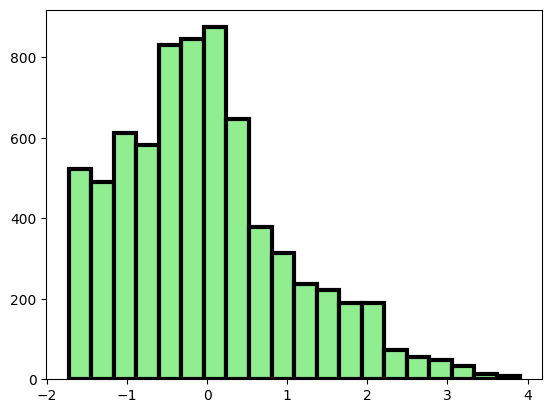

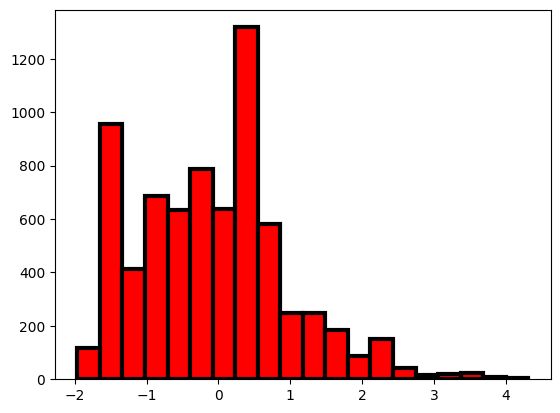

In [30]:
import matplotlib.pyplot as plt

print("Getting to know the whole numerical values:")

print(s_train.describe())
print("\n\n")

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
plt.hist(s_train["content"], color='lightgreen', ec='black', lw=3, bins=20)

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
plt.hist(s_train["wording"], color='red', ec='black', lw=3, bins=20)

Getting to know the first prompt id (39c16e):
           content      wording
count  2057.000000  2057.000000
mean     -0.095457    -0.140749
std       0.969773     1.055695
min      -1.729859    -1.962614
25%      -0.810574    -0.970213
50%      -0.157460    -0.168734
75%       0.297031     0.500911
max       3.900326     4.187398





(array([ 23., 315., 141., 171., 237., 193., 216., 243., 234.,  51.,  58.,
         63.,  34.,  24.,  27.,   4.,   5.,   7.,   9.,   2.]),
 array([-1.96261379, -1.65511321, -1.34761263, -1.04011205, -0.73261146,
        -0.42511088, -0.1176103 ,  0.18989028,  0.49739087,  0.80489145,
         1.11239203,  1.41989261,  1.7273932 ,  2.03489378,  2.34239436,
         2.64989494,  2.95739553,  3.26489611,  3.57239669,  3.87989727,
         4.18739786]),
 <BarContainer object of 20 artists>)

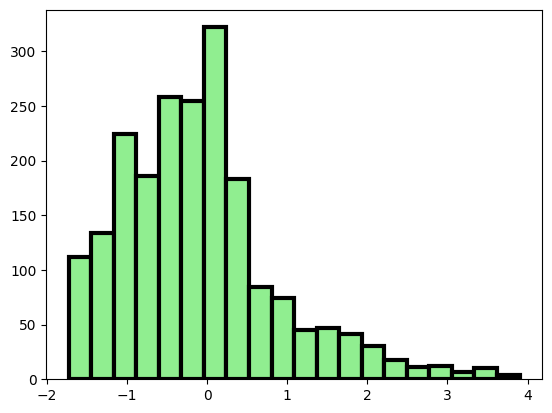

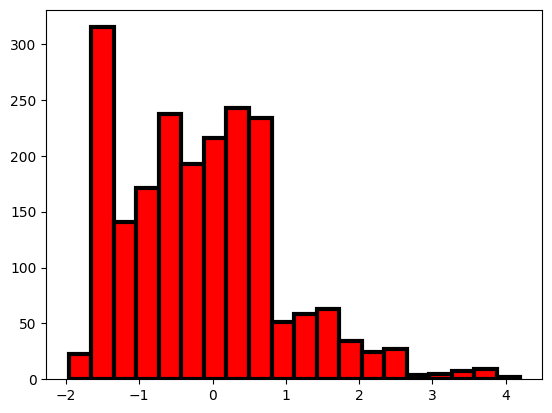

In [31]:
print("Getting to know the first prompt id (39c16e):")

print(s_train.loc[s_train["prompt_id"] == '39c16e'].describe())
print("\n\n")

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
plt.hist(s_train.loc[s_train["prompt_id"] == '39c16e']["content"], color='lightgreen', ec='black', lw=3, bins=20)

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
plt.hist(s_train.loc[s_train["prompt_id"] == '39c16e']["wording"], color='red', ec='black', lw=3, bins=20)

Getting to know the second prompt id (3b9047):
           content      wording
count  2009.000000  2009.000000
mean      0.049579    -0.068542
std       1.106129     0.952708
min      -1.729859    -1.795491
25%      -0.799545    -0.794551
50%      -0.093814    -0.045439
75%       0.702059     0.506755
max       3.894070     4.231226





(array([109., 197., 146., 173., 158., 270., 157., 396., 158.,  69.,  69.,
         44.,  23.,  27.,   8.,   2.,   0.,   2.,   0.,   1.]),
 array([-1.7954908 , -1.49415499, -1.19281917, -0.89148335, -0.59014753,
        -0.28881171,  0.0125241 ,  0.31385992,  0.61519574,  0.91653156,
         1.21786737,  1.51920319,  1.82053901,  2.12187483,  2.42321065,
         2.72454646,  3.02588228,  3.3272181 ,  3.62855392,  3.92988973,
         4.23122555]),
 <BarContainer object of 20 artists>)

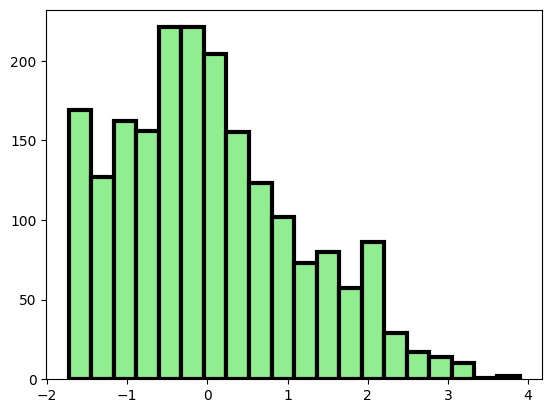

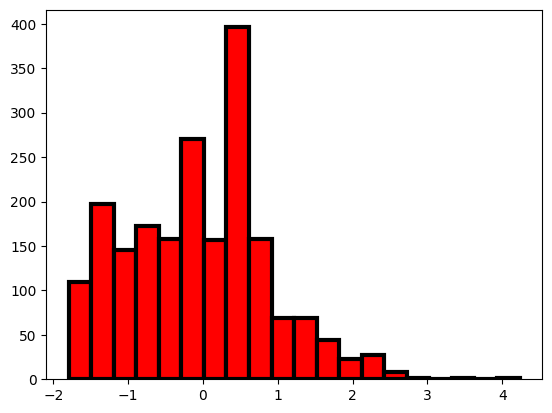

In [32]:
print("Getting to know the second prompt id (3b9047):")

print(s_train.loc[s_train["prompt_id"] == '3b9047'].describe())
print("\n\n")

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
plt.hist(s_train.loc[s_train["prompt_id"] == '3b9047']["content"], color='lightgreen', ec='black', lw=3, bins=20)

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
plt.hist(s_train.loc[s_train["prompt_id"] == '3b9047']["wording"], color='red', ec='black', lw=3, bins=20)

Getting to know the third prompt id (814d6b):
           content      wording
count  1103.000000  1103.000000
mean      0.150306     0.518733
std       1.124158     1.107806
min      -1.729859    -1.795491
25%      -0.627647    -0.125597
50%      -0.093814     0.503833
75%       0.793637     1.133263
max       3.711374     4.310693





(array([ 26.,  51.,  51.,  56.,  45., 104.,  64., 355.,  45.,  53.,  78.,
         31.,  26.,  66.,  19.,   8.,  14.,   6.,   2.,   3.]),
 array([-1.7954908 , -1.49018161, -1.18487241, -0.87956321, -0.57425401,
        -0.26894481,  0.03636438,  0.34167358,  0.64698278,  0.95229198,
         1.25760117,  1.56291037,  1.86821957,  2.17352877,  2.47883796,
         2.78414716,  3.08945636,  3.39476556,  3.70007476,  4.00538395,
         4.31069315]),
 <BarContainer object of 20 artists>)

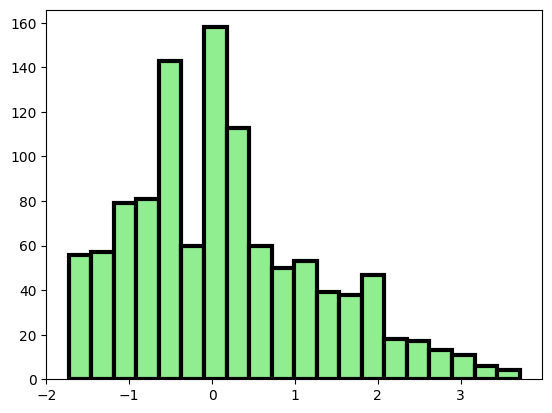

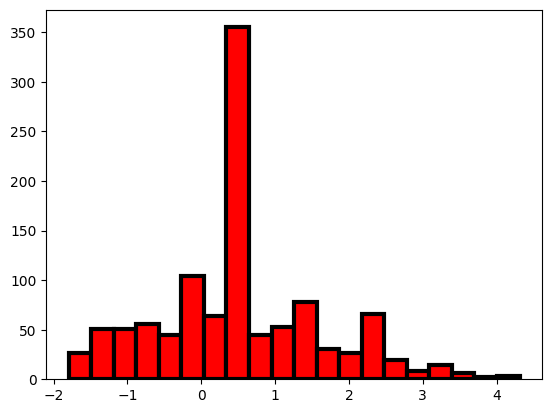

In [33]:
print("Getting to know the third prompt id (814d6b):")

print(s_train.loc[s_train["prompt_id"] == '814d6b'].describe())
print("\n\n")

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
plt.hist(s_train.loc[s_train["prompt_id"] == '814d6b']["content"], color='lightgreen', ec='black', lw=3, bins=20)

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
plt.hist(s_train.loc[s_train["prompt_id"] == '814d6b']["wording"], color='red', ec='black', lw=3, bins=20)

Getting to know the fourth prompt id (ebad26):
           content      wording
count  1996.000000  1996.000000
mean     -0.087906    -0.299023
std       0.990271     0.930270
min      -1.638511    -1.795491
25%      -0.861984    -1.050372
50%      -0.093814    -0.284364
75%       0.440020     0.380538
max       3.503226     3.638126





(array([ 99., 280., 164., 221., 177., 182., 228.,  72., 336.,  66.,  49.,
         39.,  28.,  23.,  17.,   5.,   4.,   0.,   3.,   3.]),
 array([-1.7954908 , -1.52380995, -1.25212909, -0.98044823, -0.70876738,
        -0.43708652, -0.16540566,  0.10627519,  0.37795605,  0.64963691,
         0.92131776,  1.19299862,  1.46467948,  1.73636033,  2.00804119,
         2.27972205,  2.5514029 ,  2.82308376,  3.09476462,  3.36644547,
         3.63812633]),
 <BarContainer object of 20 artists>)

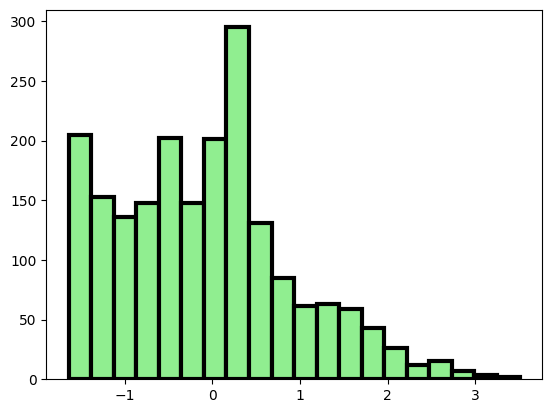

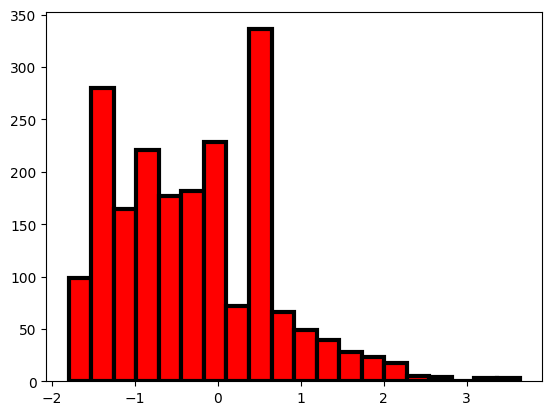

In [34]:
print("Getting to know the fourth prompt id (ebad26):")

print(s_train.loc[s_train["prompt_id"] == 'ebad26'].describe())
print("\n\n")

fig1 = plt.figure()
ax1 = fig1.add_subplot(1, 1, 1)
plt.hist(s_train.loc[s_train["prompt_id"] == 'ebad26']["content"], color='lightgreen', ec='black', lw=3, bins=20)

fig2 = plt.figure()
ax2 = fig2.add_subplot(1, 1, 1)
plt.hist(s_train.loc[s_train["prompt_id"] == 'ebad26']["wording"], color='red', ec='black', lw=3, bins=20)

Maybe it could be a good idea analyze the dataset deparately depending on the prompt

---

## Machine Learning Evaluation

